In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from utils import custom_parallel_coordinates

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [76]:
df = pd.read_csv('fight-songs-updated.csv')
df = df[df['conference'] != 'Independent']
print(df.shape)
display(df.head())

scaler = StandardScaler()
df_scaled = pd.concat(
    [
        pd.DataFrame(scaler.fit_transform(df.select_dtypes([int, float])), columns=df.select_dtypes([int, float]).columns),
        df.select_dtypes([object])
    ],
    axis=1
)
print(df_scaled.shape)
display(df_scaled.head())

(64, 23)


,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,Boston College,ACC,For Boston,T.J. Hurley,Unknown,No,Yes,No,147,84,No,0,No,No,No,No,No,No,No,No,No,0,4E8cLR6NcYCCJWqD2iwz7c
1,Clemson,ACC,Tiger Rag,Original Dixieland Jass Band,1917,No,Yes,No,145,78,No,0,No,No,No,No,No,No,No,No,Yes,1,7hGtgN4N9ebZTlC7xhvKIE
2,Duke,ACC,Fight Blue Devils,Joe Hewitt and Doug Ballin,1947,No,Yes,No,139,58,Yes,5,No,Yes,Yes,No,No,Yes,No,Yes,No,4,0fDiYvMTYWSSrIuHVJGMZj
3,Florida State,ACC,FSU Fight Song,Doug Alley and Tommie Wright,1950,Yes,Yes,No,135,92,Yes,6,Yes,Yes,Yes,No,Yes,No,No,No,Yes,5,552UZRLtAO5YXvIVRLjphI
4,Georgia Tech,ACC,Ramblin' Wreck From Georgia Tech,Unknown,Unknown,Yes,Yes,No,148,68,No,0,No,No,No,No,No,Yes,Yes,Yes,No,3,0ZOzvjnZDwrtluHrwbtvGR


(65, 23)


,bpm,sec_duration,number_fights,trope_count,school,conference,song_name,writers,year,student_writer,official_song,contest,fight,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,spotify_id
0,0.562098,0.478058,-0.891902,-2.172496,Boston College,ACC,For Boston,T.J. Hurley,Unknown,No,Yes,No,No,No,No,No,No,No,No,No,No,No,4E8cLR6NcYCCJWqD2iwz7c
1,0.501535,0.238405,-0.891902,-1.565335,Clemson,ACC,Tiger Rag,Original Dixieland Jass Band,1917,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,7hGtgN4N9ebZTlC7xhvKIE
2,0.319847,-0.560438,0.659232,0.256146,Duke,ACC,Fight Blue Devils,Joe Hewitt and Doug Ballin,1947,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes,No,0fDiYvMTYWSSrIuHVJGMZj
3,0.198721,0.797595,0.969458,0.863306,Florida State,ACC,FSU Fight Song,Doug Alley and Tommie Wright,1950,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,552UZRLtAO5YXvIVRLjphI
4,0.592379,-0.161017,-0.891902,-0.351015,Georgia Tech,ACC,Ramblin' Wreck From Georgia Tech,Unknown,Unknown,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,0ZOzvjnZDwrtluHrwbtvGR


In [78]:
df['conference'].unique()

array(['ACC', 'Big 12', 'Big Ten', 'Pac-12', 'SEC'], dtype=object)

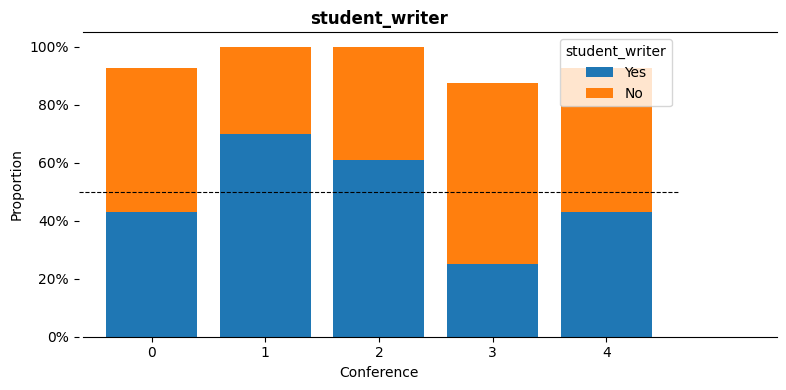

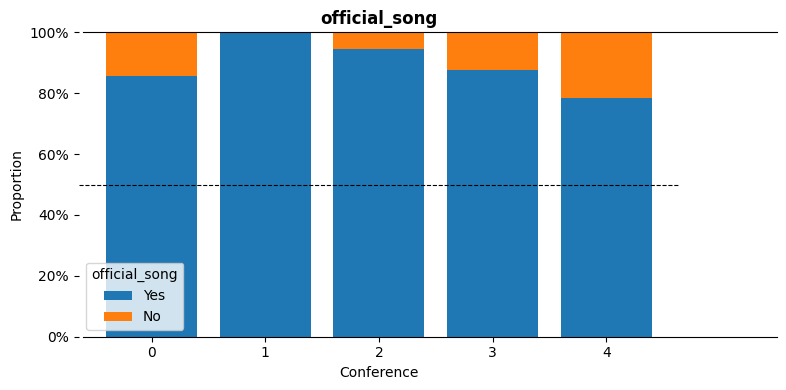

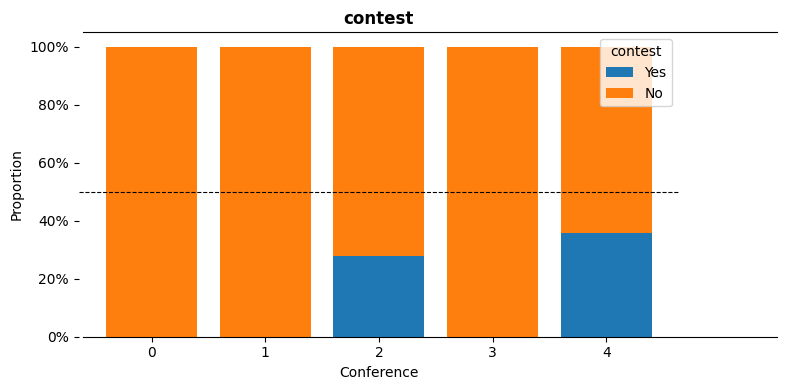

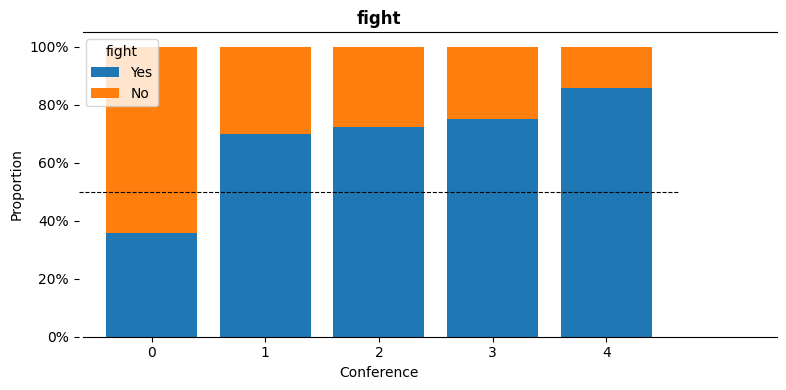

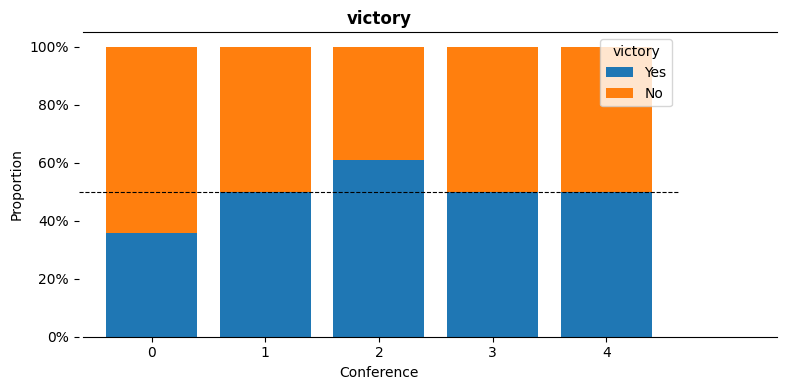

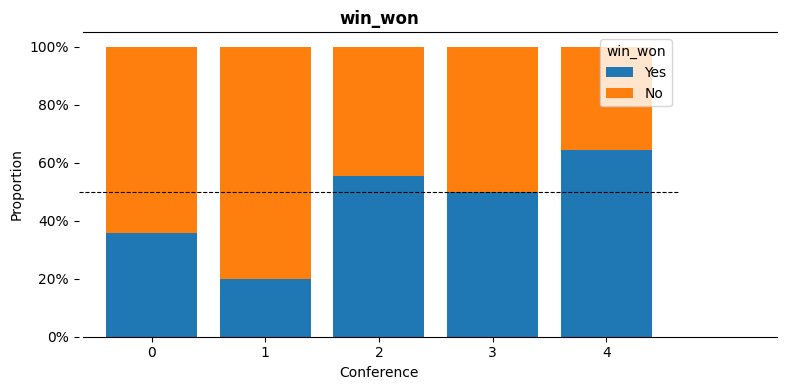

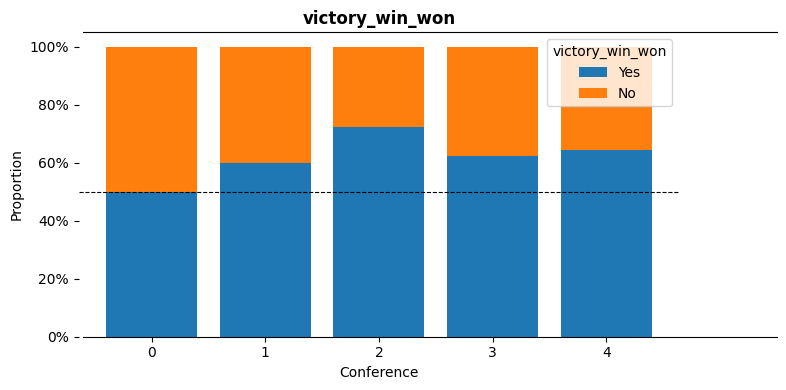

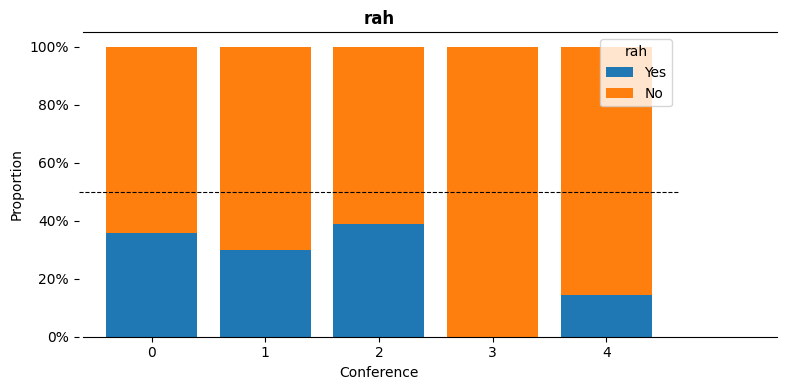

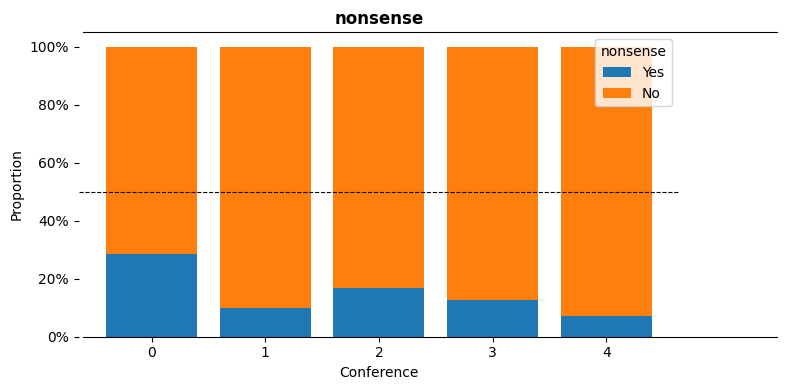

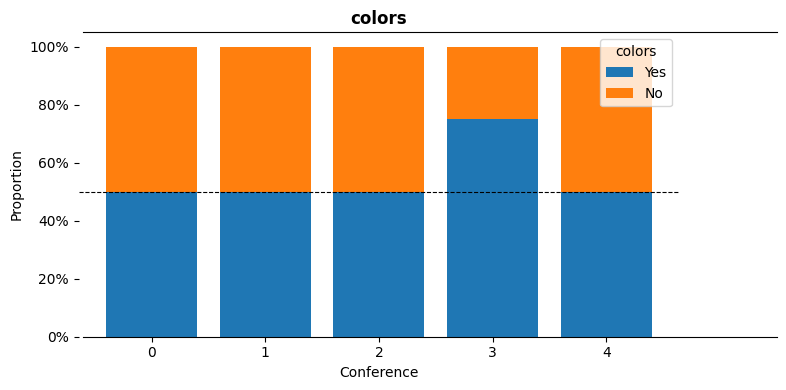

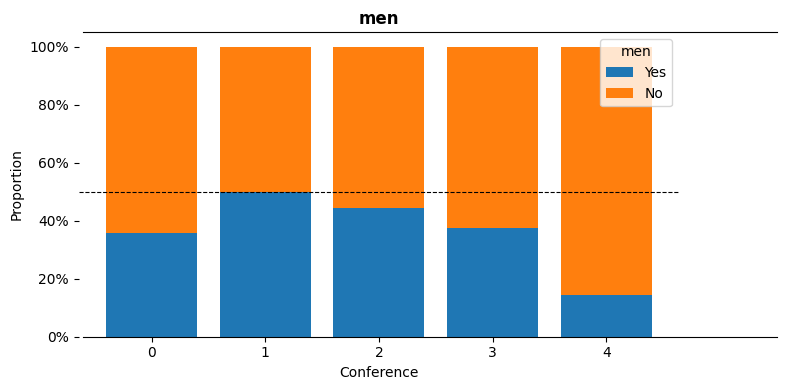

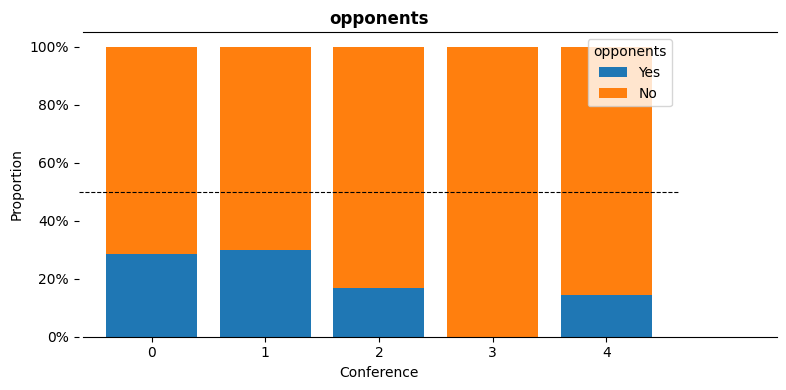

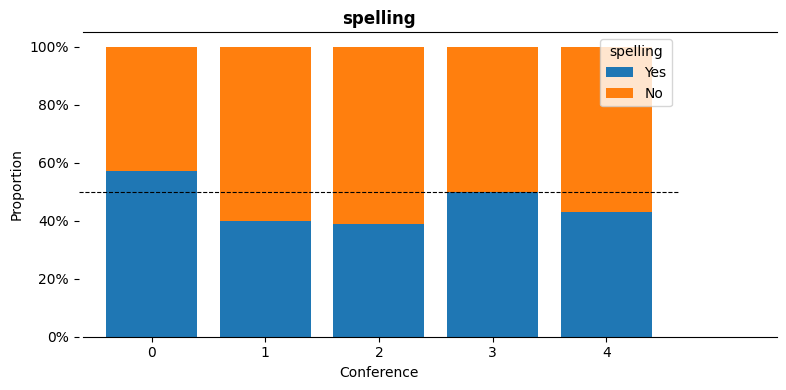

In [77]:
for var in ['student_writer', 'official_song', 'contest', 'fight', 'victory', 'win_won',
            'victory_win_won', 'rah', 'nonsense', 'colors', 'men', 'opponents', 'spelling']:

    ct = pd.crosstab(df['conference'], df[var])
    ct_norm = ct.div(ct.sum(axis=1), axis=0)

    labels = ct_norm.index
    no_vals = ct_norm['No'].values
    yes_vals = ct_norm['Yes'].values

    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.bar(x, yes_vals, label='Yes', zorder=1)
    ax.bar(x, no_vals, bottom=yes_vals, label='No', zorder=1)
    ax.axhline(0.5, color='black', linestyle='--', linewidth=0.8)

    ax.set_yticks([i for i in np.arange(0.0, 1.1, 0.2)])
    ax.set_yticklabels([str(i)+'%' for i in range(0, 101, 20)])
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Conference')
    ax.legend(title=var)

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_position(('axes', 1.0))
    ax.spines['top'].set_bounds(-0.6, 5.5)
    ax.spines['bottom'].set_bounds(-0.6, 5.5)

    ax.set_title(var, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [62]:
df['conference'].unique()

array(['ACC', 'Big 12', 'Big Ten', 'Independent', 'Pac-12', 'SEC'],
      dtype=object)

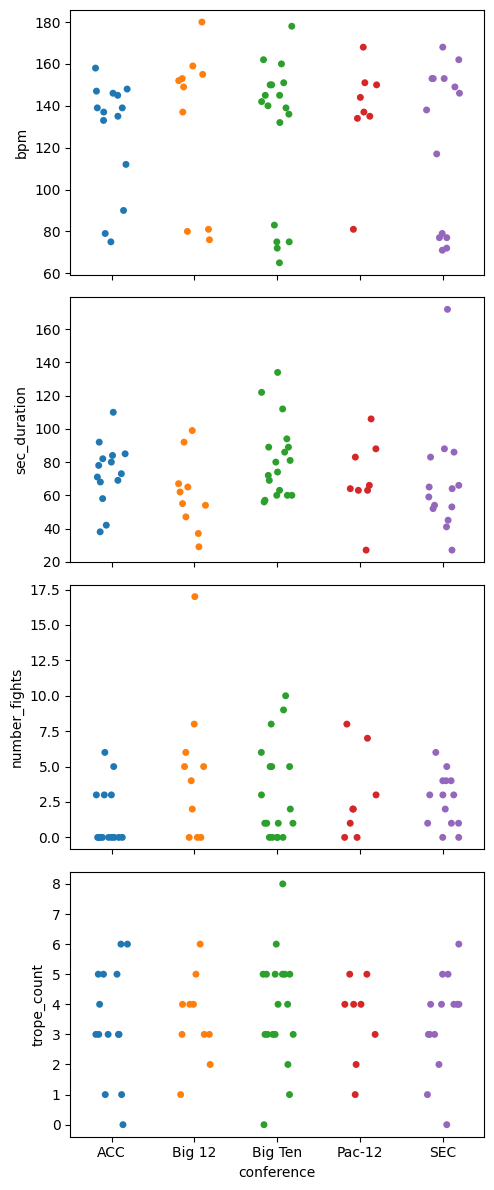

In [ ]:
num_cols = ['bpm', 'sec_duration', 'number_fights', 'trope_count']
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, sharex=True, figsize=(5, 3*len(num_cols)))
for ax, col in zip(axes, num_cols):
    sns.stripplot(
        data=df, x='conference', y=col,
        hue='conference', jitter=0.2, dodge=False, palette='tab10', ax=ax
    )
fig.tight_layout()
plt.show()

In [103]:
cat_cols = ['fight', 'win_won', 'rah', 'men', 'opponents']
concat_list = []
for col in cat_cols:
    ct = pd.crosstab(df['conference'], df[col])
    ct = ct\
        .div(ct.sum(axis=1), axis=0)\
        .reset_index()\
        .drop(columns=['No'])
    ct['cat_col'] = col
    concat_list.append(ct)
df_cat = pd.concat(concat_list, axis=0)
df_cat.head(100)

,conference,Yes,cat_col
0,ACC,0.357143,fight
1,Big 12,0.700000,fight
2,Big Ten,0.722222,fight
3,Pac-12,0.750000,fight
4,SEC,0.857143,fight
0,ACC,0.357143,win_won
1,Big 12,0.200000,win_won
2,Big Ten,0.555556,win_won
3,Pac-12,0.500000,win_won
4,SEC,0.642857,win_won


<Axes: xlabel='cat_col', ylabel='Yes'>

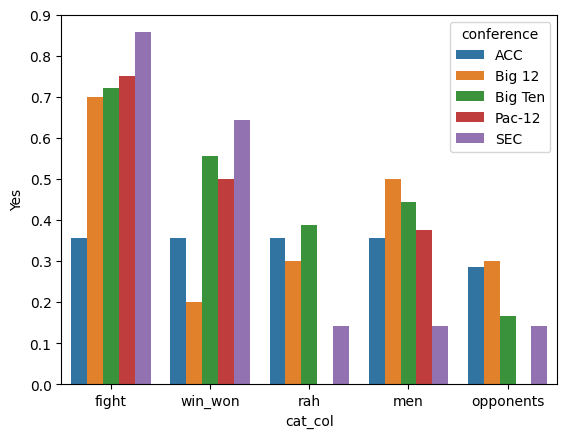

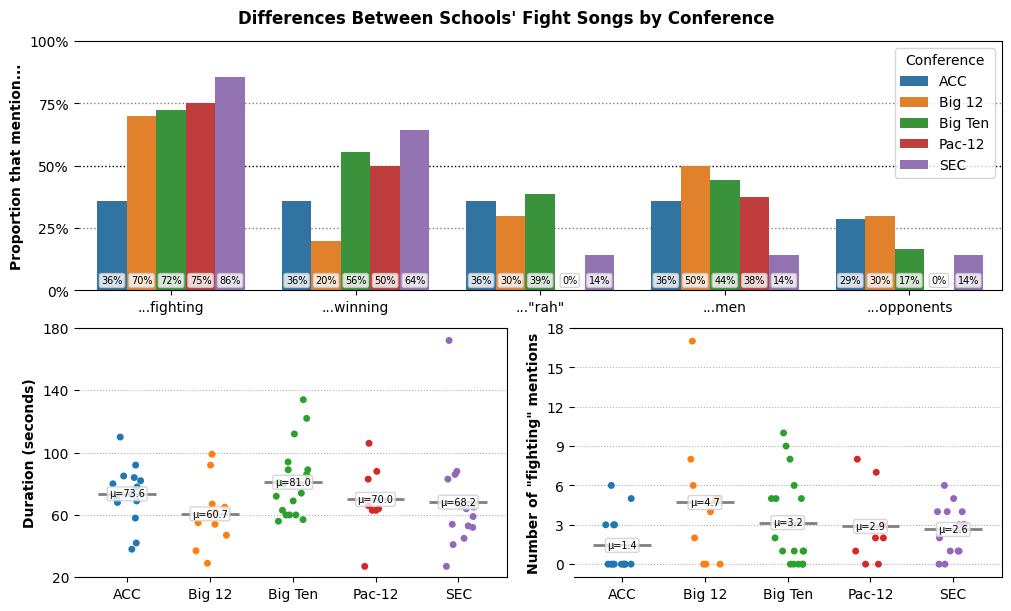

In [209]:
## Figure setup
fig = plt.figure(layout='constrained', figsize=(10, 6))
gs = GridSpec(nrows=2, ncols=2, figure=fig)
ax_cat = fig.add_subplot(gs[0, :])
ax_num0 = fig.add_subplot(gs[1, 0])
ax_num1 = fig.add_subplot(gs[1, 1])

## Barplot
ax_cat.axhline(0.5, color='black', linewidth=1, linestyle=':', zorder=0)
ax_cat.axhline(0.25, color='gray', linewidth=1, linestyle=':', zorder=0)
ax_cat.axhline(0.75, color='gray', linewidth=1, linestyle=':', zorder=0)
sns.barplot(
    data=df_cat, ax=ax_cat, zorder=1,
    x='cat_col', y='Yes', hue='conference'
)
ax_cat.set_ylim(0.0, 1.0)
ax_cat.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax_cat.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
ax_cat.set_ylabel('Proportion that mention...', fontweight='bold')
ax_cat.set_xticks(range(5))
ax_cat.set_xticklabels(['...'+_ for _ in ['fighting', 'winning', '"rah"', 'men', 'opponents']])
ax_cat.set_xlabel('')
ax_cat.spines['left'].set_visible(False)
# ax_cat.spines['right'].set_visible(False)
cat_leg = ax_cat.legend(title='Conference')

frame = cat_leg.get_frame()
bbox_style = dict(
    boxstyle='round,pad=0.2',
    facecolor=frame.get_facecolor(),
    edgecolor=frame.get_edgecolor(),
    linewidth=frame.get_linewidth()
)
for container in ax_cat.containers:
    for bar in container:
        height = bar.get_height()
        if np.isnan(height):
            continue
        ax_cat.text(
            bar.get_x() + bar.get_width() / 2,
            0.06,
            f'{height:.0%}',
            ha='center',
            va='top',
            fontsize=7,
            bbox=bbox_style,
            zorder=3
        )

## Duration stripplot
sns.stripplot(
    data=df, x='conference', y='sec_duration',
    hue='conference', jitter=0.2, dodge=False, palette='tab10', ax=ax_num0
)
ax_num0.set_ylim(20, 180)
ax_num0.set_yticks(range(20, 181, 40))
ax_num0.set_ylabel('Duration (seconds)', fontweight='bold')
ax_num0.set_xlabel('')
ax_num0.spines['left'].set_visible(False)
# ax_num0.spines['right'].set_visible(False)
ax_num0.grid(axis='y', linestyle=':')

means = df.groupby('conference')['sec_duration'].mean()
half_width = 0.25
for i, conf in enumerate(means.index):
    y = means.loc[conf]
    ax_num0.hlines(
        y,
        i-half_width-0.1,
        i+half_width+0.1,
        colors='gray',
        linewidth=2,
        zorder=2
    )
    ax_num0.text(
        i,
        y,
        f'µ={y:.1f}',
        ha='center',
        va='center',
        fontsize=7,
        bbox=bbox_style,
        zorder=3
    )

## Number fights stripplot
sns.stripplot(
    data=df, x='conference', y='number_fights',
    hue='conference', jitter=0.2, dodge=False, palette='tab10', ax=ax_num1
)
ax_num1.set_ylim(-1, 18)
ax_num1.set_yticks(range(0, 19, 3))
ax_num1.set_ylabel('Number of "fighting" mentions', fontweight='bold')
ax_num1.set_xlabel('')
ax_num1.spines['left'].set_visible(False)
# ax_num1.spines['right'].set_visible(False)
ax_num1.grid(axis='y', linestyle=':')

means = df.groupby('conference')['number_fights'].mean()
half_width = 0.25
for i, conf in enumerate(means.index):
    y = means.loc[conf]
    ax_num1.hlines(
        y,
        i-half_width-0.1,
        i+half_width+0.1,
        colors='gray',
        linewidth=2,
        zorder=2
    )
    ax_num1.text(
        i,
        y,
        f'µ={y:.1f}',
        ha='center',
        va='center',
        fontsize=7,
        bbox=bbox_style,
        zorder=3
    )

## Post figure setup
fig.suptitle("Differences Between Schools' Fight Songs by Conference", fontweight='bold')
fig.savefig('bleidig2_submission.svg')
plt.show()